In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from collections import Counter

def count_tagged_notebooks():
    """
    Count notebooks with and without tags in the dataset.

        
    Returns:
        dict: A dictionary with counts of tagged and untagged notebooks
    """
    tagged_notebooks = 0
    untagged_notebooks = 0
    total_notebooks = 0
    
    
    user_folders = [f for f in os.listdir("data") if os.path.isdir(os.path.join("data", f))]
    print(f"Found {len(user_folders)} user folders")
    
    for user in tqdm(user_folders, desc="Processing user folders"):
        user_path = os.path.join("data", user)
        
        notebook_folders = [f for f in os.listdir(user_path) if os.path.isdir(os.path.join(user_path, f))]
        
        for notebook in notebook_folders:
            notebook_path = os.path.join(user_path, notebook)
            json_path = os.path.join(notebook_path, "kernel-metadata.json")
            
            total_notebooks += 1
            
            if os.path.exists(json_path):
               
                with open(json_path, 'r', encoding='utf-8') as f:
                    metadata = json.load(f)
                
                if "keywords" in metadata and metadata["keywords"]:
                    tagged_notebooks += 1
                else:
                    untagged_notebooks += 1
            
            else:
                untagged_notebooks += 1
    
    return {
        'tagged_notebooks': tagged_notebooks,
        'untagged_notebooks': untagged_notebooks,
        'total_notebooks': total_notebooks
    }


Found 736 user folders


Processing user folders: 100%|██████████| 736/736 [00:00<00:00, 2572.47it/s]


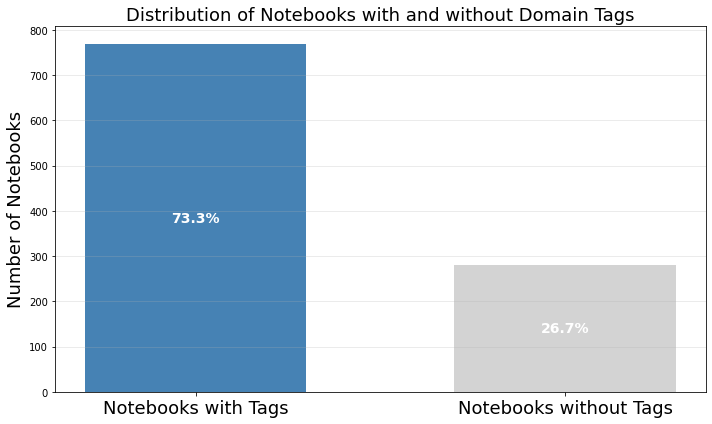

In [3]:
def plot_tag_status_distribution(stats):
    """
    Create a two-bar graph showing number of notebooks with and without tags.
    """
    categories = ['Notebooks with Tags', 'Notebooks without Tags']
    counts = [stats['tagged_notebooks'], stats['untagged_notebooks']]
    
    # Calculate percentages
    percentages = [
        stats['tagged_notebooks'] / stats['total_notebooks'] * 100,
        stats['untagged_notebooks'] / stats['total_notebooks'] * 100
    ]
    
    colors = ['steelblue', 'lightgray']
    
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(categories, counts, color=colors, width=0.6)
    
    
    for bar, percentage in zip(bars, percentages):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height()/2,
            f"{percentage:.1f}%",
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold',
            color='white'
        )
    
    plt.ylabel('Number of Notebooks', fontsize=18)
    plt.title('Distribution of Notebooks with and without Domain Tags', fontsize=18)
    plt.xticks(fontsize=18) 
    plt.grid(axis='y', alpha=0.3)
    
    
    # plt.ylim(bottom=0)
    
    # plt.text(
    #     0.5, 0.02,
    #     f"Total Notebooks: {stats['total_notebooks']}",
    #     transform=plt.gca().transAxes,
    #     ha='center',
    #     fontsize=12,
    #     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    # )
    
    plt.tight_layout()
    plt.savefig('notebook_tag_status.png', dpi=300)
    plt.show()
    

stats = count_tagged_notebooks()


plot_tag_status_distribution(stats)


Extracting tags: 100%|██████████| 736/736 [00:00<00:00, 12884.92it/s]


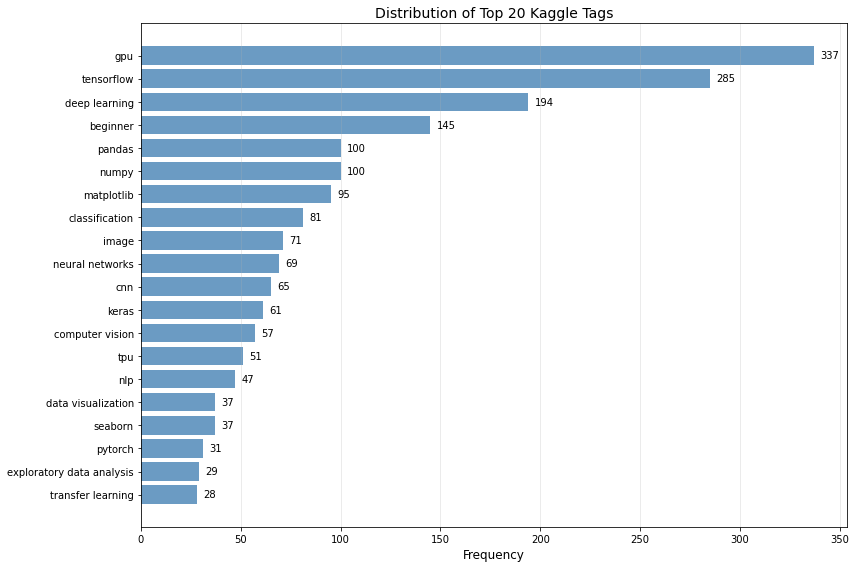

Total tags: 2,473
Unique tags: 144
Most common tag: 'gpu' appears 337 times


In [4]:
def extract_all_tags():
    """
    Extract all tags from notebooks that have tags.
    Returns a list of all tags.
    """
    all_tags = []
    
    user_folders = [f for f in os.listdir("data") if os.path.isdir(os.path.join("data", f))]
    
    for user in tqdm(user_folders, desc="Extracting tags"):
        user_path = os.path.join("data", user)
        
        notebook_folders = [f for f in os.listdir(user_path) if os.path.isdir(os.path.join(user_path, f))]
        
        for notebook in notebook_folders:
            notebook_path = os.path.join(user_path, notebook)
            json_path = os.path.join(notebook_path, "kernel-metadata.json")
            
            if os.path.exists(json_path):
                try:
                    with open(json_path, 'r', encoding='utf-8') as f:
                        metadata = json.load(f)
                    
                    if "keywords" in metadata and metadata["keywords"]:
                        all_tags.extend(metadata["keywords"])
                except Exception as e:
                    continue
    
    return all_tags

def plot_tag_distribution(all_tags, top_n=20):
    """
    Plot the distribution of the most frequent tags.
    
    Args:
        all_tags (list): List of all tags
        top_n (int): Number of top tags to display (default: 20)
    """
    if not all_tags:
        print("No tags found to plot")
        return
    
    tag_counts = Counter(all_tags)
    
    top_tags = tag_counts.most_common(top_n)
    tags, frequencies = zip(*top_tags)
    
    plt.figure(figsize=(12, 8))
    
    y_pos = np.arange(len(tags))
    bars = plt.barh(y_pos, frequencies, color='steelblue', alpha=0.8)
    
    plt.yticks(y_pos, tags)
    plt.xlabel('Frequency', fontsize=12)
    plt.title(f'Distribution of Top {top_n} Kaggle Tags', fontsize=14)
    
    plt.gca().invert_yaxis()  # Show highest frequency at top
    
    for i, (bar, freq) in enumerate(zip(bars, frequencies)):
        plt.text(bar.get_width() + max(frequencies)*0.01, bar.get_y() + bar.get_height()/2, 
                str(freq), va='center', fontsize=10)
    
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total tags: {len(all_tags):,}")
    print(f"Unique tags: {len(tag_counts):,}")
    print(f"Most common tag: '{tags[0]}' appears {frequencies[0]} times")


all_tags = extract_all_tags()

plot_tag_distribution(all_tags, top_n=20)

Counting tags per notebook: 100%|██████████| 736/736 [00:00<00:00, 3135.95it/s]


TypeError: text() missing 1 required positional argument: 's'

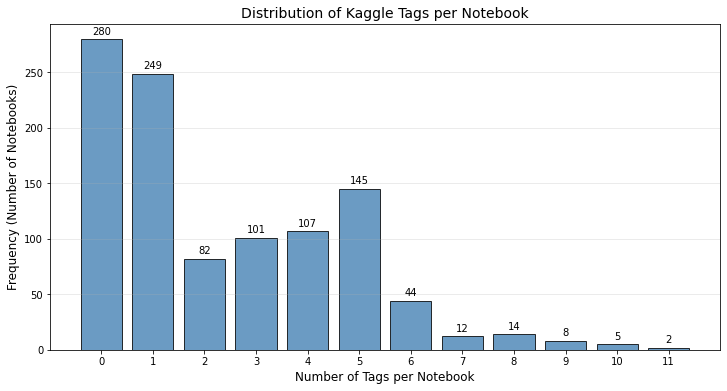

In [8]:
def get_tags_per_notebook():
    """
    Get the number of tags for each notebook.
    Returns a list where each element is the number of tags in a notebook.
    """
    tags_per_notebook = []
    
    user_folders = [f for f in os.listdir("data") if os.path.isdir(os.path.join("data", f))]
    
    for user in tqdm(user_folders, desc="Counting tags per notebook"):
        user_path = os.path.join("data", user)
        
        notebook_folders = [f for f in os.listdir(user_path) if os.path.isdir(os.path.join(user_path, f))]
        
        for notebook in notebook_folders:
            notebook_path = os.path.join(user_path, notebook)
            json_path = os.path.join(notebook_path, "kernel-metadata.json")
            
            if os.path.exists(json_path):
                with open(json_path, 'r', encoding='utf-8') as f:
                    metadata = json.load(f)
    
                if "keywords" in metadata and metadata["keywords"]:
                    tags_per_notebook.append(len(metadata["keywords"]))
                else:
                    tags_per_notebook.append(0)
            else:
                tags_per_notebook.append(0)
    
    return tags_per_notebook

def plot_tags_per_notebook_distribution(tags_per_notebook):
    """
    Plot the distribution of number of tags per notebook.
    
    Args:
        tags_per_notebook (list): List of tag counts per notebook
    """
    if not tags_per_notebook:
        print("No data found to plot")
        return
    
    tag_count_frequency = Counter(tags_per_notebook)
    
    num_tags = sorted(tag_count_frequency.keys())
    frequencies = [tag_count_frequency[x] for x in num_tags]
    
    plt.figure(figsize=(12, 6))
    
    plt.bar(num_tags, frequencies, color='steelblue', alpha=0.8, edgecolor='black')
    
    plt.xlabel('Number of Tags per Notebook', fontsize=12)
    plt.ylabel('Frequency (Number of Notebooks)', fontsize=12)
    plt.title('Distribution of Kaggle Tags per Notebook', fontsize=14)

    
    for x, y in zip(num_tags, frequencies):
        if y > 0:  
            plt.text(x, y + max(frequencies)*0.01, str(y), ha='center', va='bottom', fontsize=10)
    
    plt.grid(axis='y', alpha=0.3)
    
    plt.xticks(num_tags)
    

    mean_tags = np.mean(tags_per_notebook)
    median_tags = np.median(tags_per_notebook)
    max_tags = max(tags_per_notebook)
    zero_tags = tags_per_notebook.count(0)
    
    # stats_text = f'Total Notebooks: {len(tags_per_notebook):,}\n'
    # stats_text += f'Mean: {mean_tags:.2f} tags\n'
    # stats_text += f'Median: {median_tags:.0f} tags\n'
    # stats_text += f'Max: {max_tags} tags\n'
    # stats_text += f'No tags: {zero_tags:,} notebooks ({zero_tags/len(tags_per_notebook)*100:.1f}%)'
    
    plt.text(0.98, 0.95, transform=plt.gca().transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    

    plt.tight_layout()
    plt.show()
    # print(f"Distribution Summary:")
    # print(f"Total notebooks: {len(tags_per_notebook):,}")
    # print(f"Notebooks with 0 tags: {zero_tags:,} ({zero_tags/len(tags_per_notebook)*100:.1f}%)")
    # print(f"Notebooks with tags: {len(tags_per_notebook)-zero_tags:,} ({(len(tags_per_notebook)-zero_tags)/len(tags_per_notebook)*100:.1f}%)")
    # print(f"Average tags per notebook: {mean_tags:.2f}")
    # print(f"Most tags in a single notebook: {max_tags}")

tags_per_notebook = get_tags_per_notebook()

plot_tags_per_notebook_distribution(tags_per_notebook)

In [13]:
import math
population = 37764
z = 2.576
e = 0.02
p = 0.5
n_inf = (z * z * p * (1-p)) / (e * e)
n_fin = n_inf / (1 + (n_inf - 1) / population)
sample_size = math.ceil(n_fin)
print("Required sample size:", sample_size)
percentage = round(sample_size/population*100, 2)
print("Percentage:", percentage)

Required sample size: 3738
Percentage: 9.9
